# EV (Bikes) Market Segmentation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [2]:
bikes_df=pd.read_csv("new_bikes.csv")

In [3]:
bikes_df.tail()


,Unnamed: 0,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
48,48,Ather 500X,Ather Energy,Scooter,4.0,150,5.0,165000.0,7.0,90.0,2022.0
49,49,Pure EV Epluto 8G,Pure EV,Scooter,3.5,140,3.5,120000.0,5.0,85.0,2022.0
50,50,Okinawa iPraise Pro X,Okinawa Autotech,Scooter,3.0,120,3.0,95000.0,4.0,70.0,2022.0
51,51,Joy E-Bike Urbanite X3,Electric Vehicle Co.,Bike,2.9,85,2.5,75000.0,3.0,65.0,2022.0
52,52,Ampere Zeo,Ampere Vehicles,Scooter,3.5,120,NaN,NaN,NaN,NaN,NaN


# EDA

In [4]:
bikes_df.drop('Unnamed: 0', axis=1, inplace=True)
bikes_df.drop(52, inplace=True)
bikes_df.head()

,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,Ola Electric S1,Ola,Scooter,2.98,181,5.0,85099.0,4.5,116.0,2021.0
1,Ola Electric S1 Pro,Ola,Scooter,4.00,181,6.5,120149.0,11.0,116.0,2021.0
2,TVS iQube,TVS,Scooter,3.40,75,6.5,117630.0,4.4,78.0,2020.0
3,Aura 300 Plus,Ather Energy,Scooter,2.90,116,4.5,129000.0,6.0,80.0,2021.0
4,Pure EV Epluto 7G,Pure EV,Scooter,2.70,120,3.0,109000.0,5.0,80.0,2021.0


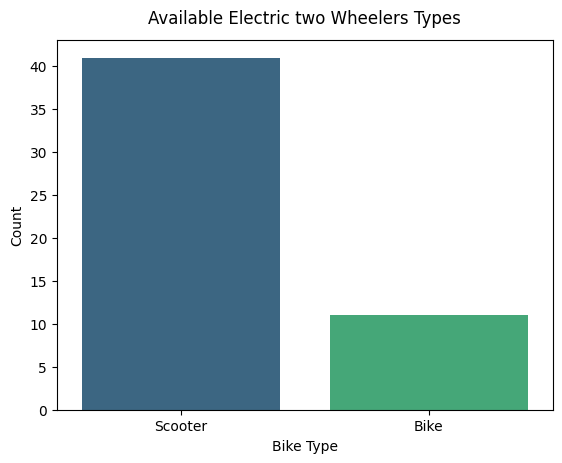

In [7]:
sns.countplot(data=bikes_df, x='Vehicle Type', palette='viridis')
plt.xlabel('Bike Type')
plt.ylabel('Count')
plt.title(label='Available Electric two Wheelers Types',pad=12)
plt.show()

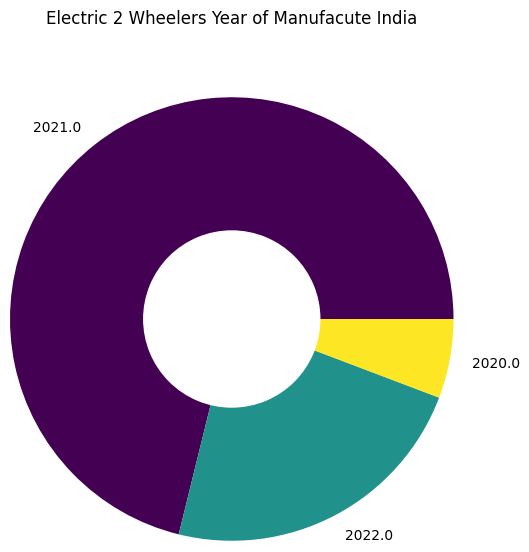

In [52]:
x = bikes_df['Year of Manufacture'].value_counts().plot.pie(radius=1.5, cmap='viridis')
plt.pie(x=[1], radius=.6, colors='white')
plt.title(label='Electric 2 Wheelers Year of Manufacute India', pad=80)
plt.ylabel('')
plt.show()


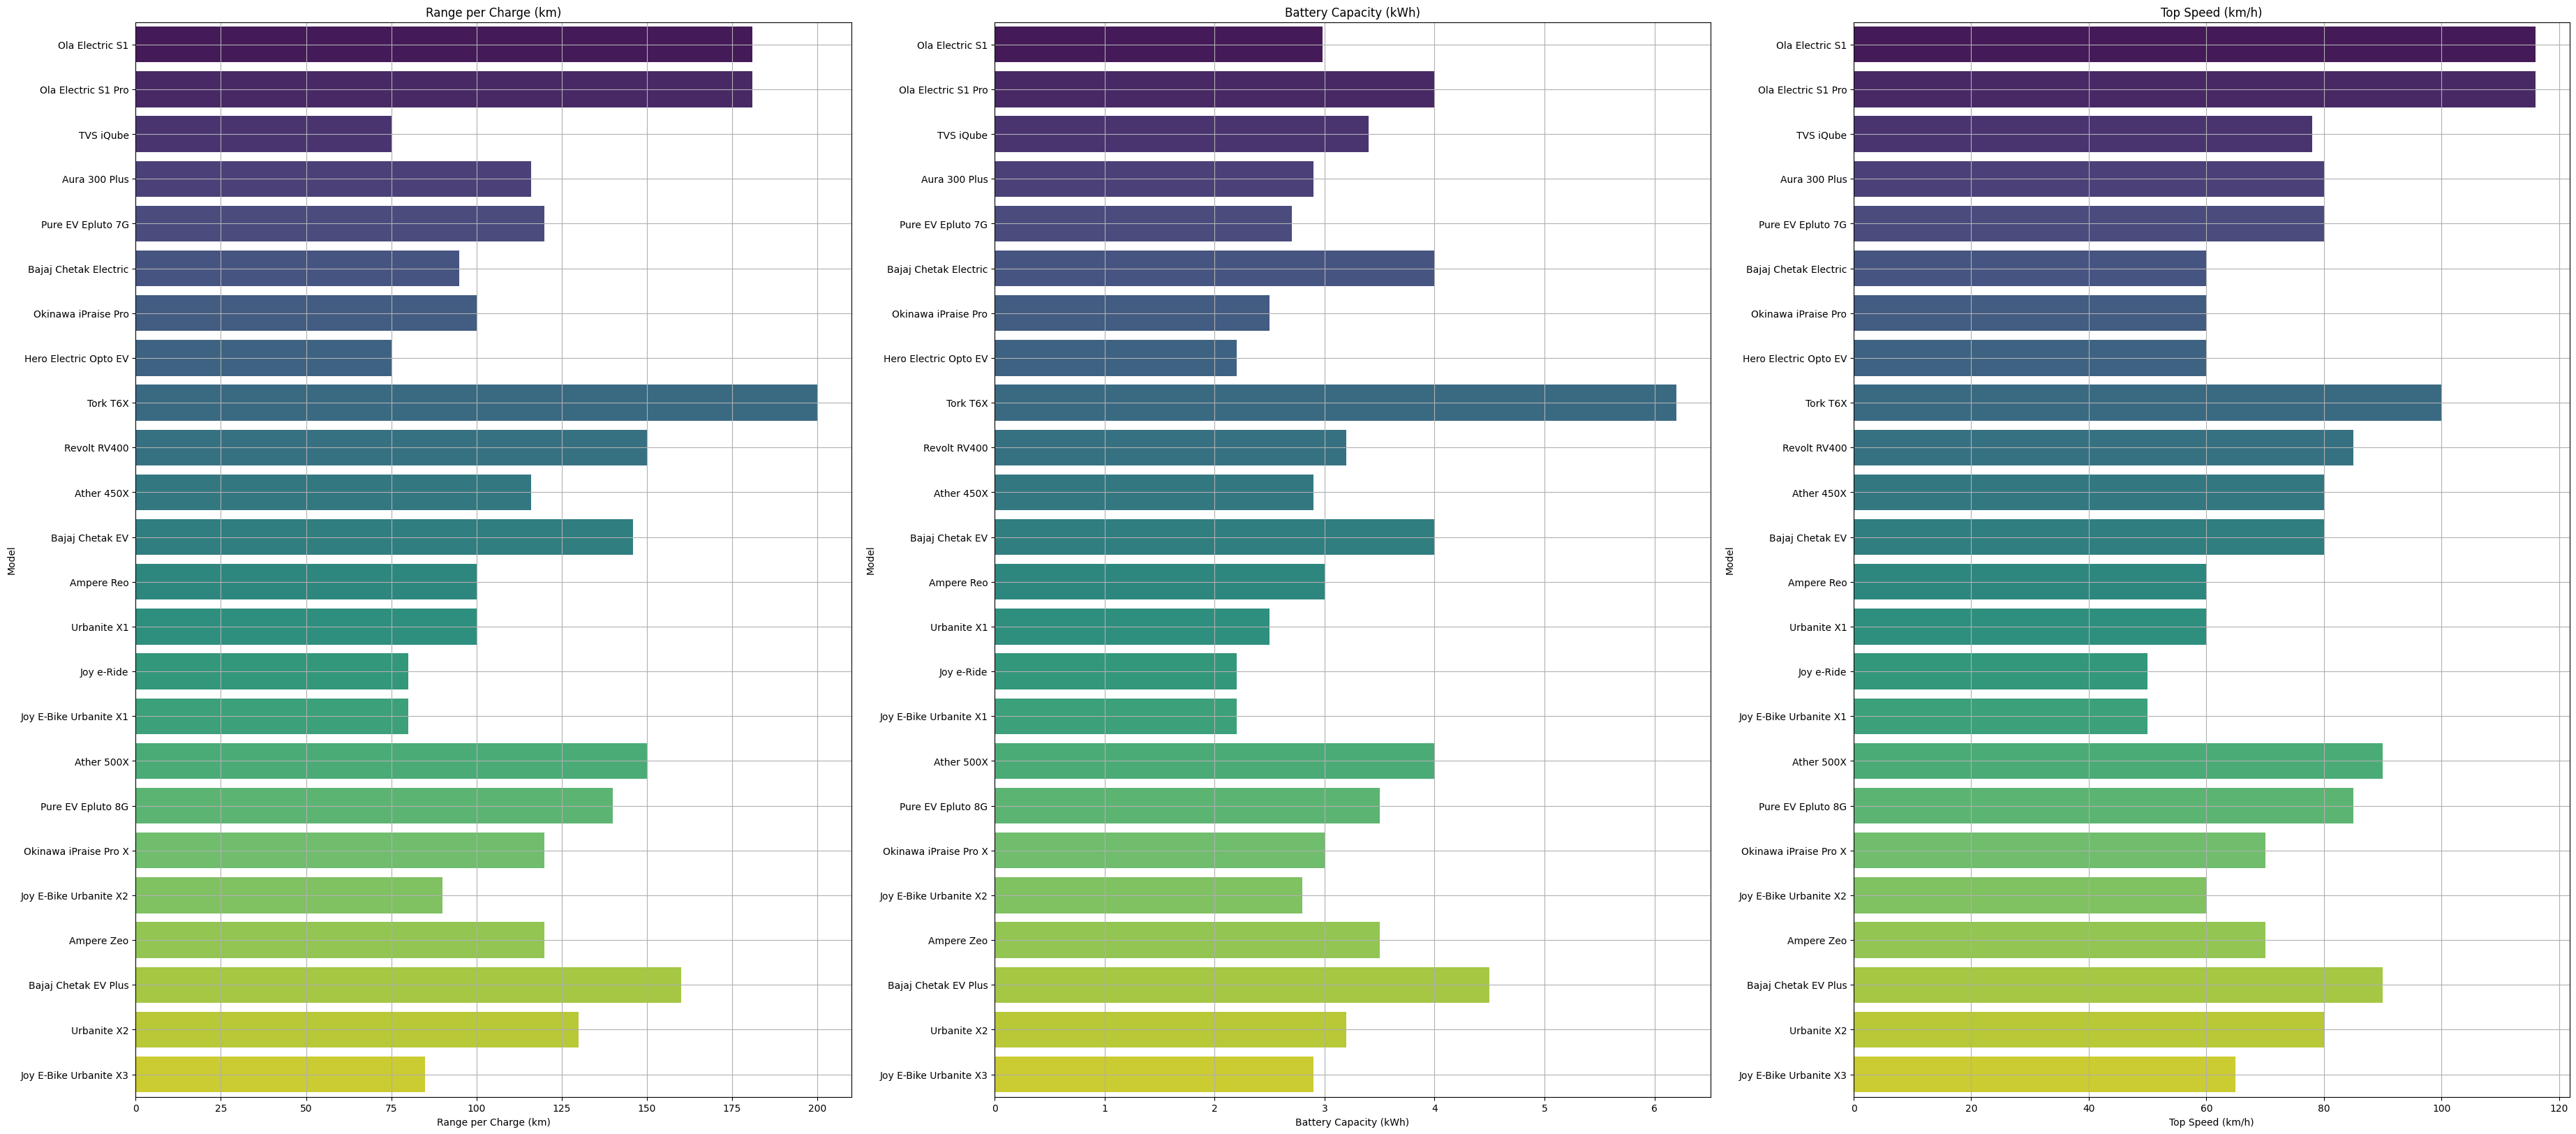

In [9]:
plt.figure(1, figsize=(45,20))
n=0

for x in ['Range per Charge (km)', 'Battery Capacity (kWh)','Top Speed (km/h)']:
    n += 1
    plt.subplot(1,3,n)
    sns.barplot(data=bikes_df, y=bikes_df['Model'].sort_values(ascending=True), x=x, palette='viridis')
    plt.title(f'{x}')
    plt.grid(True)
plt.show()

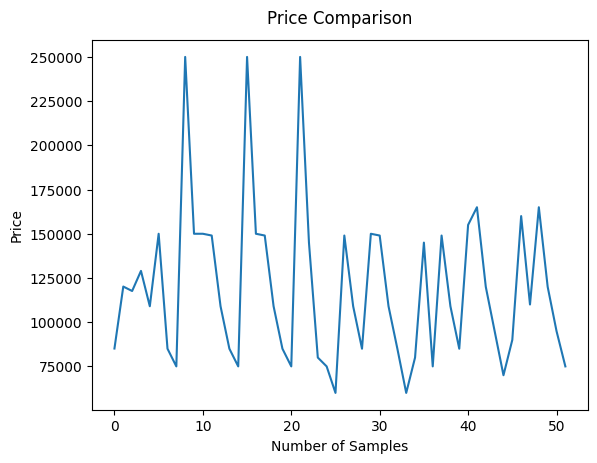

In [10]:
plt.plot(bikes_df['Price'])
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Price Comparison',pad=12);

# 2 Wheeler Segmentation

In [12]:
# 49th row contains NaN values thus dropped
new_bikes_df=bikes_df.drop(49)
new_bikes_df['Vehicle Type'].replace(to_replace=['Scooter','Bike'],value=[0, 1], inplace=True)

In [13]:
X = new_bikes_df[['Vehicle Type','Battery Capacity (kWh)','Range per Charge (km)','Charging Time', 'Price',
         'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture']]

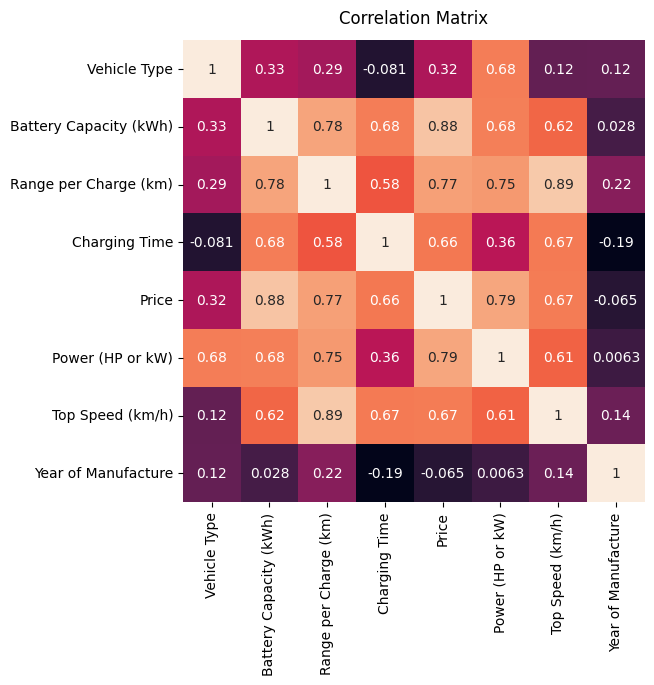

In [14]:
plt.figure(figsize=(6,6))
sns.heatmap(data=X.corr(), annot=True, cbar=False, square=True)
plt.title('Correlation Matrix',pad=12);

In [15]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
pca = PCA()    #creating the instance of class PCA
pca.fit_transform(X_scaled) 
pca.explained_variance_ratio_

array([0.57709368, 0.17253988, 0.13328151, 0.05185932, 0.0335145 ,
       0.01811631, 0.00880176, 0.00479303])

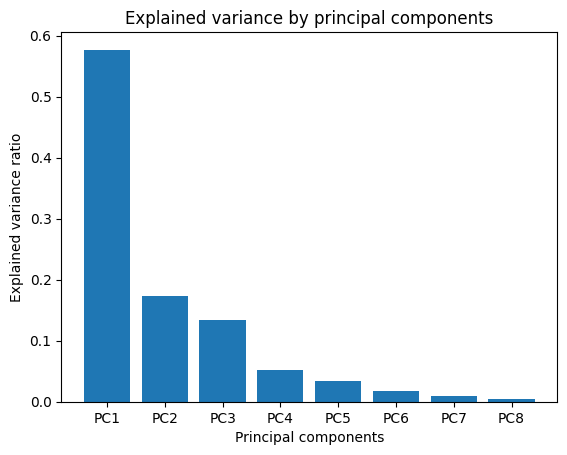

In [17]:
components=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

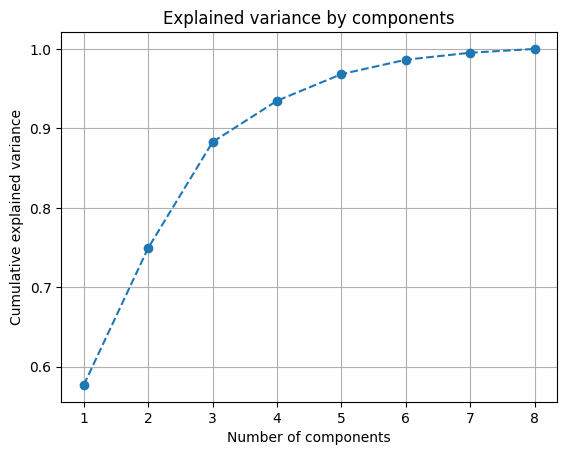

In [18]:
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [19]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4'])
df_pca.head()


,PC1,PC2,PC3,PC4
0,1.503078,1.388905,-1.384091,2.192278
1,3.154668,1.876417,-0.996621,1.296237
2,0.027291,2.739152,1.835036,-0.281784
3,0.038391,0.851359,-0.014584,0.209208
4,-0.712720,0.165038,-0.134792,0.754506


In [20]:
rotations = pca.components_.T

rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=X.columns[:8])

rotations_df = rotations_df.round(1)

std_devs = np.sqrt(pca.explained_variance_).round(1)

print("Standard deviations:")
print(std_devs)
print("Rotation matrix:")
print(rotations_df)

Standard deviations:
[2.2 1.2 1.  0.7]
Rotation matrix:
                        PC1  PC2  PC3  PC4
Vehicle Type            0.2 -0.7  0.4 -0.0
Battery Capacity (kWh)  0.4  0.1  0.0 -0.6
Range per Charge (km)   0.4 -0.0 -0.2  0.3
Charging Time           0.3  0.5 -0.0 -0.2
Price                   0.4  0.1  0.1 -0.3
Power (HP or kW)        0.4 -0.3  0.2  0.2
Top Speed (km/h)        0.4  0.1 -0.3  0.6
Year of Manufacture     0.0 -0.4 -0.8 -0.3


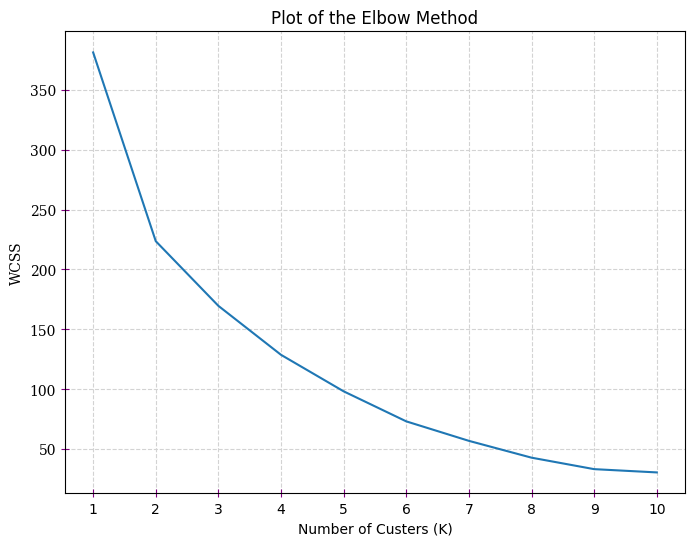

In [21]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [35]:
kmean = KMeans(n_clusters=3, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=3, random_state=90)

In [36]:
print(kmean.labels_)

[2 1 2 2 2 2 0 0 1 1 2 2 2 0 0 1 1 2 2 0 0 1 2 0 0 0 2 2 0 1 2 2 0 0 0 2 0
 2 2 0 1 1 2 0 0 2 1 2 1 0 0]


In [37]:
pd.Series(kmean.labels_).value_counts()


2    21
0    19
1    11
Name: count, dtype: int64

In [38]:
new_bikes_df['clusters'] = kmean.labels_


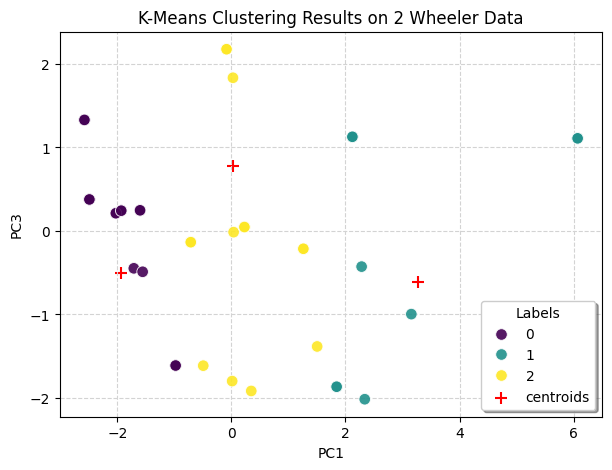

In [39]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC3', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="+", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.grid(True)
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results on 2 Wheeler Data')
plt.show()

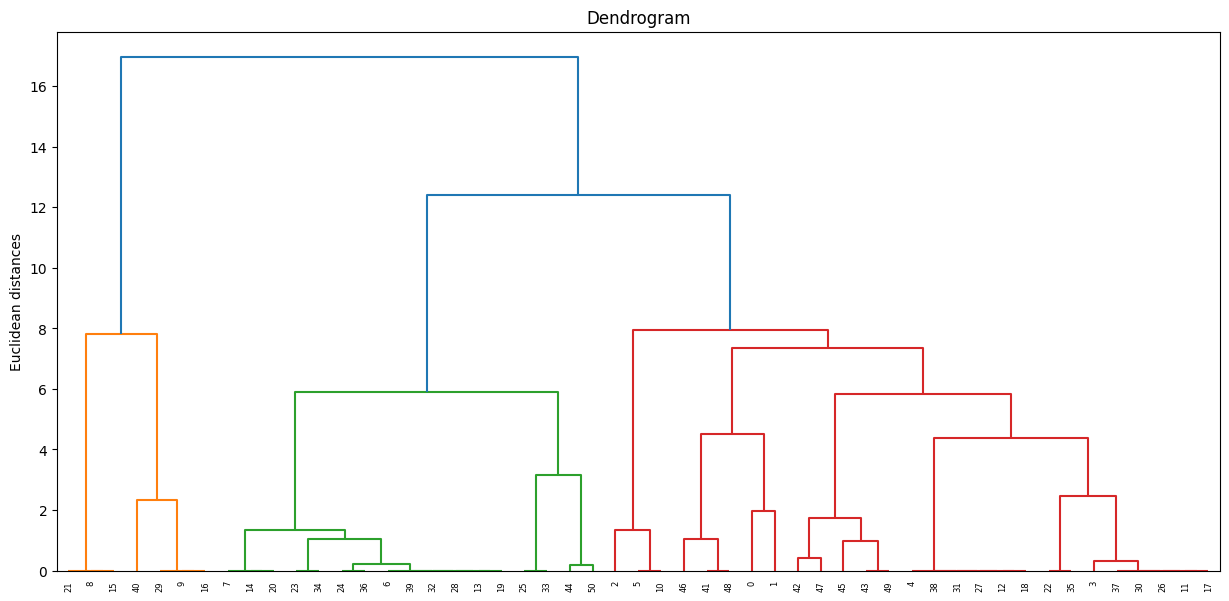

In [40]:
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.show()

# Making Predictions


In [41]:
new_bikes_df["clusters"].value_counts()


clusters
2    21
0    19
1    11
Name: count, dtype: int64

In [43]:
Cluster_0=new_bikes_df[new_bikes_df.clusters==0]
Cluster_1=new_bikes_df[new_bikes_df.clusters==1]
Cluster_2=new_bikes_df[new_bikes_df.clusters==2]

In [44]:
[Cluster_0["Manufacturer"].value_counts().head(),
Cluster_1["Manufacturer"].value_counts().head(),
Cluster_2["Manufacturer"].value_counts().head()]
#ola, bajaj, ether, revolt are among most selling brands according to dataset

[Manufacturer
 Okinawa Autotech        8
 Electric Vehicle Co.    5
 Hero Motocorp           3
 Ampere Vehicles         2
 Joy E-Bike              1
 Name: count, dtype: int64,
 Manufacturer
 Revolt Motors    4
 Tork Motors      3
 Ather Energy     2
 Ola              1
 Bajaj Auto       1
 Name: count, dtype: int64,
 Manufacturer
 Pure EV         7
 Ather Energy    6
 Bajaj Auto      4
 Ola             1
 TVS             1
 Name: count, dtype: int64]

In [45]:
[Cluster_0["Price"].value_counts().head(),
Cluster_1["Price"].value_counts().head(),
Cluster_2["Price"].value_counts().head()]
#85K-150k

[Price
 85000.0    6
 75000.0    6
 80000.0    2
 60000.0    2
 95000.0    2
 Name: count, dtype: int64,
 Price
 250000.0    3
 150000.0    3
 165000.0    2
 120149.0    1
 155000.0    1
 Name: count, dtype: int64,
 Price
 109000.0    6
 149000.0    5
 150000.0    2
 145000.0    2
 85099.0     1
 Name: count, dtype: int64]

In [46]:
[Cluster_0["Vehicle Type"].value_counts().head(),
Cluster_1["Vehicle Type"].value_counts().head(),
Cluster_2["Vehicle Type"].value_counts().head()]
 

[Vehicle Type
 0    15
 1     4
 Name: count, dtype: int64,
 Vehicle Type
 1    7
 0    4
 Name: count, dtype: int64,
 Vehicle Type
 0    21
 Name: count, dtype: int64]

In [47]:
[Cluster_0["Top Speed (km/h)"].value_counts().head(),
Cluster_1["Top Speed (km/h)"].value_counts().head(),
Cluster_2["Top Speed (km/h)"].value_counts().head()]

[Top Speed (km/h)
 60.0    14
 50.0     2
 70.0     2
 65.0     1
 Name: count, dtype: int64,
 Top Speed (km/h)
 85.0     4
 100.0    3
 90.0     3
 116.0    1
 Name: count, dtype: int64,
 Top Speed (km/h)
 80.0     15
 60.0      2
 116.0     1
 78.0      1
 85.0      1
 Name: count, dtype: int64]

In [48]:
[Cluster_0["Range per Charge (km)"].value_counts().head(),
Cluster_1["Range per Charge (km)"].value_counts().head(),
Cluster_2["Range per Charge (km)"].value_counts().head()]

[Range per Charge (km)
 100    10
 75      3
 80      2
 120     2
 90      1
 Name: count, dtype: int64,
 Range per Charge (km)
 150    6
 200    3
 181    1
 160    1
 Name: count, dtype: int64,
 Range per Charge (km)
 120    7
 116    6
 95     2
 146    2
 181    1
 Name: count, dtype: int64]

In [49]:
[Cluster_0["Battery Capacity (kWh)"].value_counts().head(),
Cluster_1["Battery Capacity (kWh)"].value_counts().head(),
Cluster_2["Battery Capacity (kWh)"].value_counts().head()]

[Battery Capacity (kWh)
 2.5    8
 2.2    5
 3.0    4
 2.8    1
 2.9    1
 Name: count, dtype: int64,
 Battery Capacity (kWh)
 3.2    4
 4.0    3
 6.2    3
 4.5    1
 Name: count, dtype: int64,
 Battery Capacity (kWh)
 2.90    6
 2.70    6
 4.00    4
 3.50    2
 2.98    1
 Name: count, dtype: int64]

In [50]:
[Cluster_0["Charging Time"].value_counts().head(),
Cluster_1["Charging Time"].value_counts().head(),
Cluster_2["Charging Time"].value_counts().head()]

[Charging Time
 3.0    13
 2.5     4
 3.5     2
 Name: count, dtype: int64,
 Charging Time
 5.0    5
 4.0    4
 6.5    1
 6.0    1
 Name: count, dtype: int64,
 Charging Time
 4.5    6
 3.0    6
 5.0    3
 5.5    2
 4.0    2
 Name: count, dtype: int64]

In [51]:
new_bikes_df.head()

,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,clusters
0,Ola Electric S1,Ola,0,2.98,181,5.0,85099.0,4.5,116.0,2021.0,2
1,Ola Electric S1 Pro,Ola,0,4.00,181,6.5,120149.0,11.0,116.0,2021.0,1
2,TVS iQube,TVS,0,3.40,75,6.5,117630.0,4.4,78.0,2020.0,2
3,Aura 300 Plus,Ather Energy,0,2.90,116,4.5,129000.0,6.0,80.0,2021.0,2
4,Pure EV Epluto 7G,Pure EV,0,2.70,120,3.0,109000.0,5.0,80.0,2021.0,2
